Mounted at /content/gdrive
['BlackFriday.csv', 'BlackFriday.ipynb', 'Untitled0.ipynb']


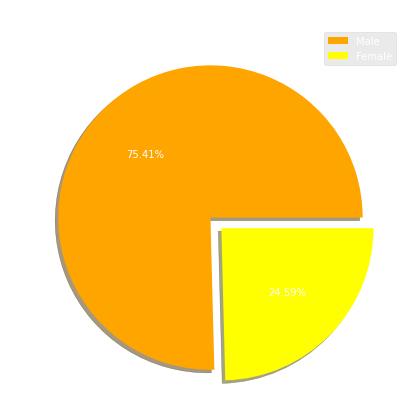

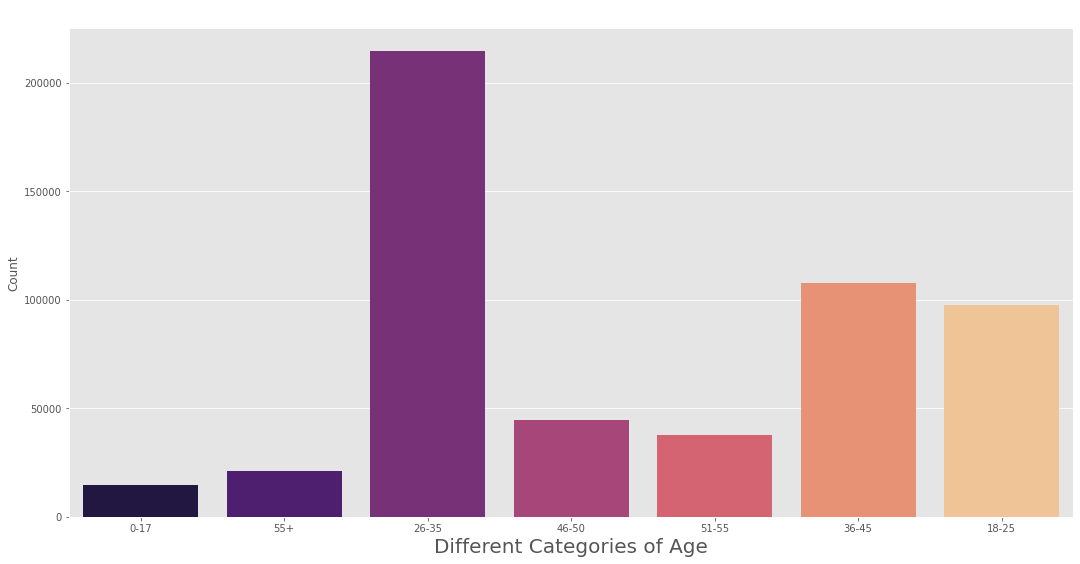

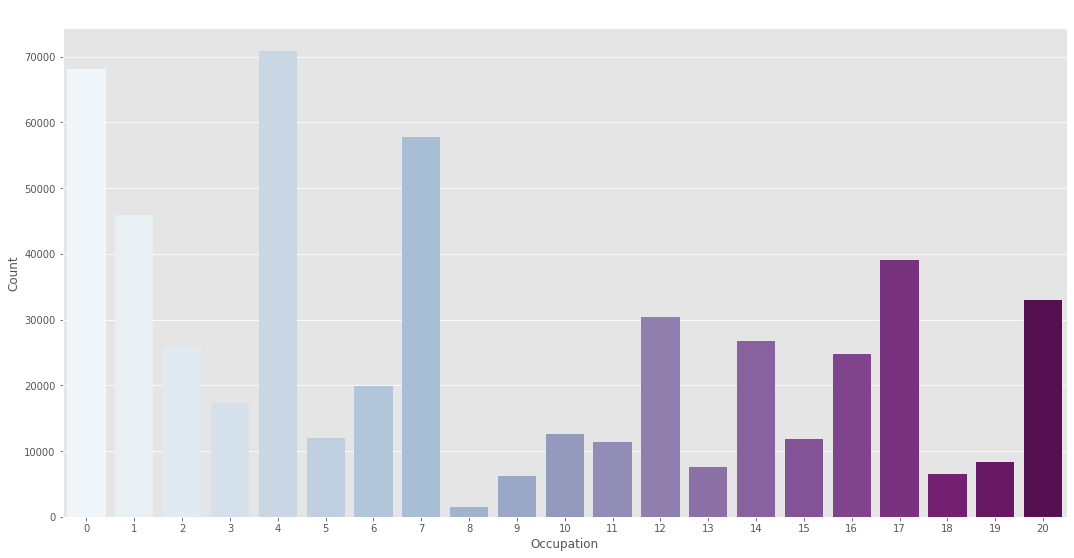

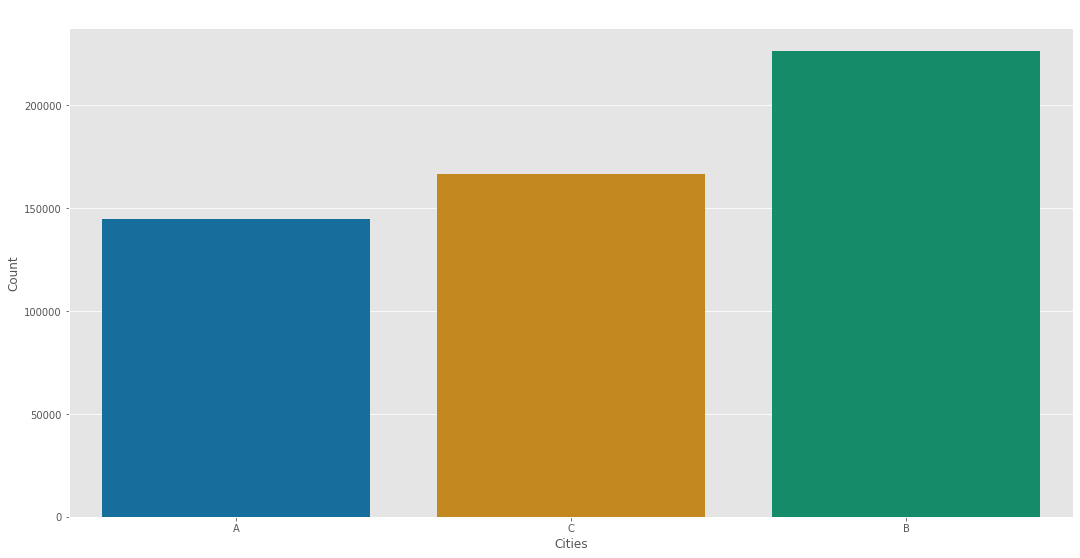

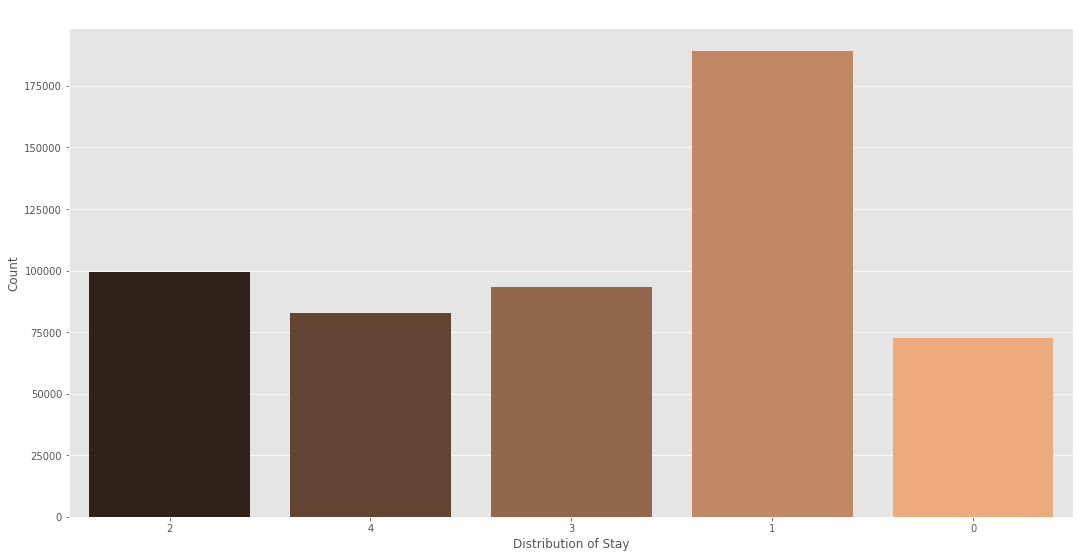

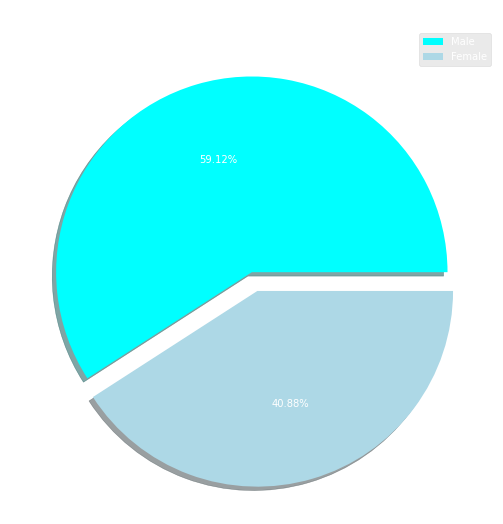

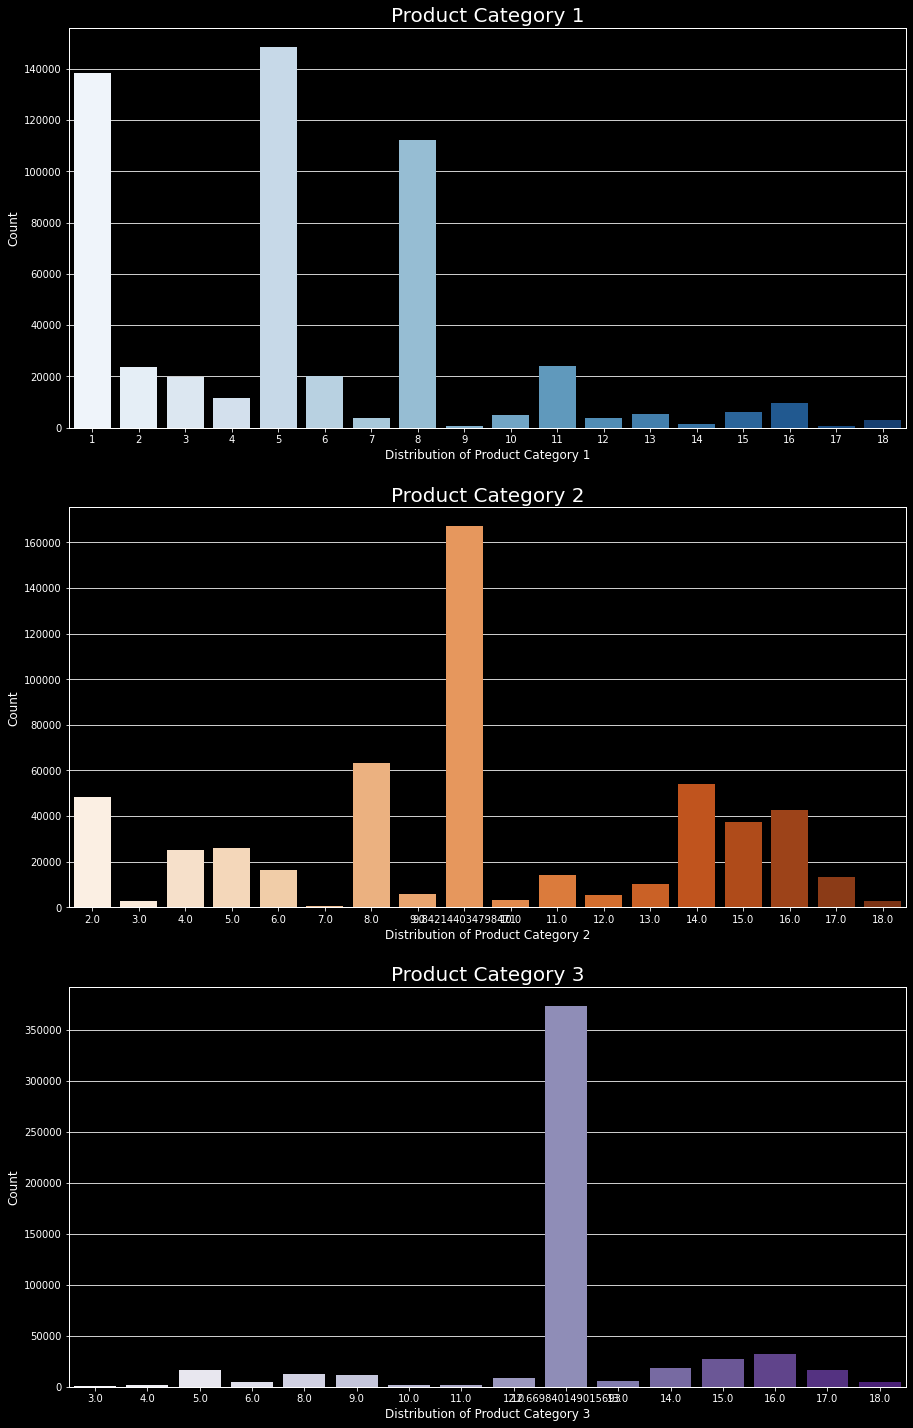

The mu 9333.859852635065 and Sigma 4981.017499809046 for the curve


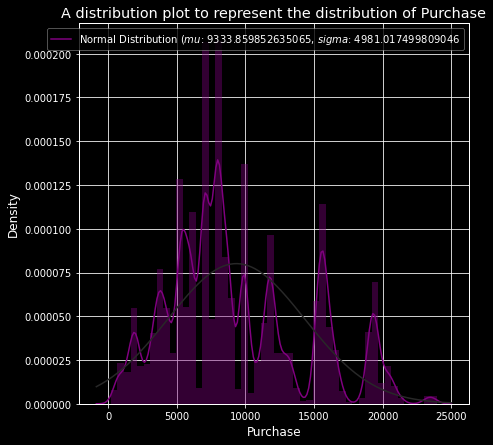

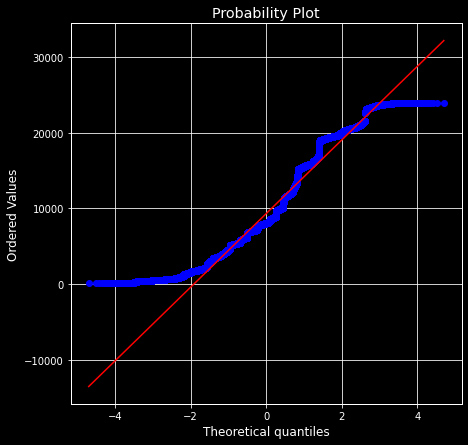

Shape of x:  (537577, 9)
Shape of y:  (537577,)
Shape of x_train:  (376303, 9)
Shape of x_test:  (161274, 9)
Shape of y_train:  (376303,)
Shape of y_test:  (161274,)
RMSE Error: 4695.362375463748
R2 Score: 0.11192492615761584
RMSE Error: 4695.361251304079
R2 Score: 0.11192535140192406


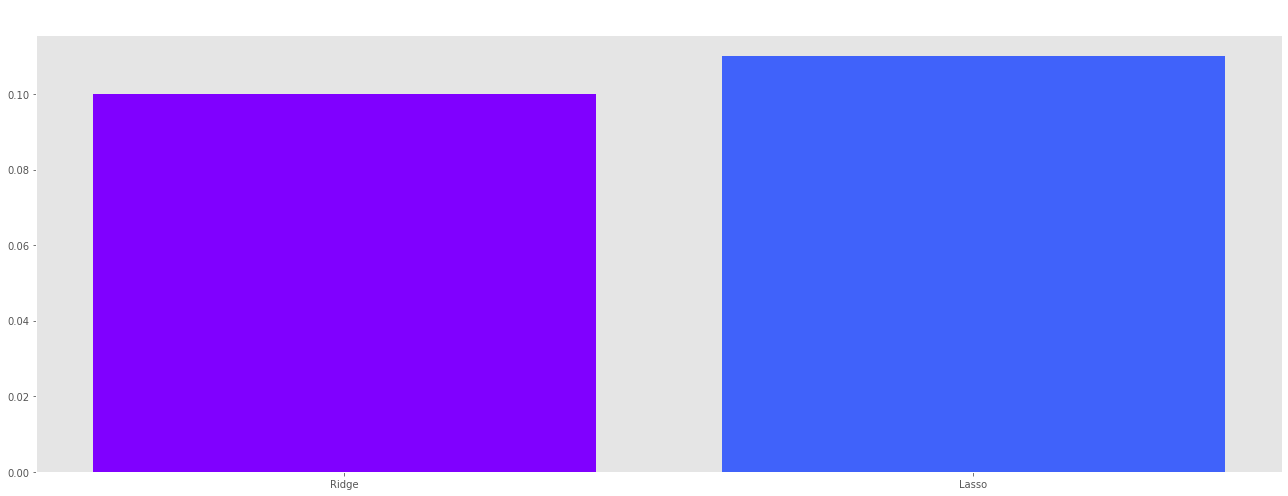

In [3]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for providing path
import os
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# Get the current working directory (cwd)
cwd = os.getcwd()

# Get all the files in that directory
files = os.listdir(cwd)
print(os.listdir('/content/gdrive/MyDrive/Colab Notebooks'))

# reading file 

data = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/BlackFriday.csv")

# getting the shape
data.shape

# checking the sample of the data
data.sample(5)

# decsribing the data

data.describe()

# checking if there is any NULL values present in the dataset
data.isnull().sum()

# imputing missing values

data['Product_Category_2'].fillna(data['Product_Category_2'].mean(), inplace = True)
data['Product_Category_3'].fillna(data['Product_Category_3'].mean(), inplace = True)

data.isnull().sum().sum()

# finding the maximum purchase in both male and female

data.groupby(data.Gender).Purchase.max()

# finding the minimum purchase in both male and female

data.groupby(data.Gender).Purchase.min()

# checking dependency of gender on purchase

x = data[['Gender', 'Purchase']].groupby('Gender').mean()
x = pd.DataFrame(x)
x

# checing the dependency of age attribute with purchasing power

y = data[['Age', 'Purchase']].groupby('Age').mean()
y = pd.DataFrame(y)
y

# checking the dependency of cities where custoer live with the purchasing power

data[['City_Category', 'Purchase']].groupby('City_Category').mean()

# pie chart 

size = data['Gender'].value_counts()
labels = ['Male', 'Female']
colors = ['orange', 'yellow']
explode = [0, 0.1]

plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

# visualizing the age of customers

plt.rcParams['figure.figsize'] = (18, 9)
plt.style.use('ggplot')

sns.countplot(data['Age'], palette = 'magma')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Different Categories of Age', fontsize = 20)
plt.ylabel('Count')
plt.show()

# visualizing the occupation of customers

plt.rcParams['figure.figsize'] = (18, 9)
plt.style.use('ggplot')

sns.countplot(data['Occupation'], palette = 'BuPu')
plt.title('Distribution of Occupation across customers', fontsize = 20)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

# visulaizing the cities the customers are from

sns.countplot(data['City_Category'], palette = 'colorblind')
plt.title('Distribution of Cities across customers', fontsize = 20)
plt.xlabel('Cities')
plt.ylabel('Count')
plt.show()

# visualizing the stay in current years

# we need to label the 4+ to 5 to visualize the stay of customers in a city
data['Stay_In_Current_City_Years'].replace('4+', 4, inplace = True)

sns.countplot(data['Stay_In_Current_City_Years'], palette = 'copper')
plt.title('Distribution of Stay across customers', fontsize = 20)
plt.xlabel('Distribution of Stay')
plt.ylabel('Count')
plt.show()

# pie chart 

size = [317817, 219760]
labels = ['Male', 'Female']
colors = ['cyan', 'lightblue']
explode = [0, 0.1]

plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.legend()
plt.show()

# visualizing the different product categories

plt.rcParams['figure.figsize'] = (15, 25)
plt.style.use('dark_background')

plt.subplot(3, 1, 1)
sns.countplot(data['Product_Category_1'], palette = 'Blues')
plt.title('Product Category 1', fontsize = 20)
plt.xlabel('Distribution of Product Category 1')
plt.ylabel('Count')

plt.subplot(3, 1, 2)
sns.countplot(data['Product_Category_2'], palette = 'Oranges')
plt.title('Product Category 2', fontsize = 20)
plt.xlabel('Distribution of Product Category 2')
plt.ylabel('Count')

plt.subplot(3, 1, 3)
sns.countplot(data['Product_Category_3'], palette = 'Purples')
plt.title('Product Category 3', fontsize = 20)
plt.xlabel('Distribution of Product Category 3')
plt.ylabel('Count')

plt.show()

# visualizing the purchase attribute which is our target variable

import warnings
warnings.filterwarnings('ignore')

# importing important libraries
from scipy import stats
from scipy.stats import norm

# plotting a distribution plot for the target variable
plt.rcParams['figure.figsize'] = (7, 7)
sns.distplot(data['Purchase'], color = 'purple', fit = norm)

# fitting the target variable to the normal curve 
mu, sigma = norm.fit(data['Purchase']) 
print("The mu {} and Sigma {} for the curve".format(mu, sigma))

plt.title('A distribution plot to represent the distribution of Purchase')
plt.legend(['Normal Distribution ($mu$: {}, $sigma$: {}'.format(mu, sigma)], loc = 'best')
plt.show()

# plotting the QQplot
stats.probplot(data['Purchase'], plot = plt)
plt.show()

# removing unwanted columns

# saving the attributes User_ID and Product_ID before deleting them
User_ID = data['User_ID']
Product_ID = data['Product_ID']

data = data.drop(['User_ID', 'Product_ID'], axis = 1)

# checking the new shape of data
data.shape

# label encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Gender'] = le.fit_transform(data['Gender'])
data['City_Category'] = le.fit_transform(data['City_Category'])
data['Age'] = le.fit_transform(data['Age'])

# splitting the data into dependent and independents sets

y = data['Purchase']

# now removing the purchase column from the dataset
data = data.drop(['Purchase'], axis = 1)

x = data

# checking the shapes of x and y
print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

# splitting into training and testing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ",y_test.shape)

# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# predictive analytics
# regression analysis
# Linear Regression

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = Ridge()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# predictive analytics
# regression analysis
# Linear Regression

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = Lasso()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# predictive analytics
# regression analysis
# Linear Regression

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2_score = np.array([0.1, 0.11])
labels = np.array(['Ridge', 'Lasso'])
indices = np.argsort(r2_score)
color = plt.cm.rainbow(np.linspace(0, 1, 9))

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18, 7)
plt.bar(range(len(indices)), r2_score[indices], color = color)
plt.xticks(range(len(indices)), labels[indices])
plt.title('R2 Score', fontsize = 30)
plt.grid()
plt.tight_layout()
plt.show()

